In [1]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import talib as ta2
import numpy as np
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# tickerSymbol = 'itc.NS'
# # tickerSymbol = 'NFLX'

# tickerData = yf.Ticker(tickerSymbol)

# start_date = '2000-01-01'
# end_date = dt.now().strftime('%Y-%m-%d')

# df = tickerData.history(period='1d', start=start_date, end=end_date)

# df.head(5)

In [3]:
start_date = '2000-01-01'
end_date = dt.now().strftime('%Y-%m-%d')

stocks = ['HCLTECH', 'WIPRO', 'INFY', 'TCS', 'TECHM']

df = pd.concat([yf.download(f"{i}.NS", period='1d', start=start_date, end=end_date) for i in stocks])

df.head(5)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-08-12,22.712500,23.987499,22.625000,23.762501,14.427619,11239400
2002-08-13,24.250000,24.250000,23.150000,23.325001,14.161989,3756368
2002-08-14,23.237499,23.237499,22.768749,23.006250,13.968451,3964016
2002-08-15,23.006250,23.006250,23.006250,23.006250,13.968451,0
2002-08-16,23.625000,23.750000,23.250000,23.606251,14.332746,4848904


In [4]:
df['EMA_10'] = ta.ema(df['Close'],length=10)
df['EMA_30'] = ta.ema(df['Close'],length=30)
df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'], length=14)
df['ADX'] = ta.adx(df['High'], df['Low'], df['Close'], length=14)['ADX_14']/100
df['RSI'] = ta.rsi(df['Close'], length=14)/100

macd = ta.macd(df['Close'], fast=12, slow=26, signal=9)
df['MACD'] = macd['MACD_12_26_9']
df['MACD_signal'] = macd['MACDs_12_26_9']
df['MACD_hist'] = macd['MACDh_12_26_9']

df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,EMA_10,EMA_30,ATR,ADX,RSI,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,,
2023-08-28,1189.550049,1196.300049,1182.300049,1184.750000,1184.750000,950013,1200.753676,1187.383667,24.836756,0.211172,0.482953,9.626044,14.152359,-4.526315
2023-08-29,1192.400024,1207.900024,1188.250000,1198.000000,1198.000000,1419344,1200.253008,1188.068592,24.716276,0.203566,0.523625,8.710503,13.063987,-4.353485
2023-08-30,1207.949951,1221.599976,1194.550049,1197.199951,1197.199951,2016339,1199.697907,1188.657712,24.882965,0.201909,0.520961,7.830112,12.017212,-4.187100
2023-08-31,1199.000000,1214.500000,1198.000000,1201.949951,1201.949951,2817747,1200.107369,1189.515276,24.341328,0.200370,0.536057,7.430032,11.099776,-3.669744
2023-09-01,1205.000000,1229.900024,1204.050049,1228.050049,1228.050049,1686038,1205.187856,1192.001390,24.599096,0.204752,0.608974,9.113966,10.702614,-1.588648


In [5]:
df['Close_EMA_10'] = np.where(df['Close'] > df['EMA_10'], 1, 0)
df['EMA_10_EMA_30'] = np.where(df['EMA_10'] > df['EMA_30'], 1, 0)
df['MACD_Signal_MACD'] = np.where((df['MACD_signal'] < df['MACD'])&(df['MACD']>0), 1, 0)

In [6]:
df.tail(30)

,Open,High,Low,Close,Adj Close,Volume,EMA_10,EMA_30,ATR,ADX,RSI,MACD,MACD_signal,MACD_hist,Close_EMA_10,EMA_10_EMA_30,MACD_Signal_MACD
Date,,,,,,,,,,,,,,,,,
2023-07-21,1199.500000,1217.949951,1181.000000,1195.099976,1195.099976,5032086,1208.631483,1161.070465,30.620332,0.339314,0.570496,34.245057,29.660412,4.584645,0,1,1
2023-07-24,1196.500000,1203.949951,1155.250000,1161.849976,1161.849976,2669308,1200.125755,1161.120756,31.911733,0.318828,0.490699,28.475907,29.423511,-0.947604,0,1,0
2023-07-25,1164.000000,1164.699951,1145.000000,1156.500000,1156.500000,2557865,1192.193799,1160.822643,31.039463,0.296180,0.479088,23.204627,28.179734,-4.975107,0,1,0
2023-07-26,1158.000000,1167.000000,1139.449951,1143.199951,1143.199951,3170213,1183.285827,1159.685695,30.790219,0.276855,0.450545,17.749295,26.093646,-8.344352,0,1,0
2023-07-27,1111.000000,1125.000000,1082.300049,1099.900024,1099.900024,17594818,1168.124772,1155.828555,32.940911,0.275106,0.372695,9.818777,22.838673,-13.019895,0,1,0
2023-07-28,1100.000000,1100.000000,1085.050049,1091.050049,1091.050049,4244321,1154.111186,1151.649296,31.655842,0.273481,0.359039,2.787533,18.828445,-16.040912,0,1,0
2023-07-31,1095.000000,1119.000000,1087.150024,1115.500000,1115.500000,4766331,1147.090970,1149.317084,31.669709,0.264607,0.422043,-0.802620,14.902232,-15.704852,0,0,0
2023-08-01,1120.000000,1154.500000,1119.900024,1143.500000,1143.500000,3805214,1146.438067,1148.941788,32.193301,0.246712,0.484531,-1.372653,11.647255,-13.019908,0,0,0
2023-08-02,1143.000000,1152.599976,1125.599976,1145.650024,1145.650024,2357217,1146.294786,1148.729416,31.822351,0.230096,0.489099,-1.632105,8.991383,-10.623488,0,0,0


In [7]:
def analyse_candlestick_patterns(df, pattern:str):
    x = eval(f"(ta2.CDL{pattern}(df['Open'], df['High'], df['Low'], df['Close'])/100).reset_index()")
    x = x[x[0]==1]
    x.rename(columns = {0:pattern}, inplace = True)
    return x.set_index('Date')

In [8]:
patterns = ['RICKSHAWMAN', 'ABANDONEDBABY', 'HARAMICROSS', 'HARAMI', '3WHITESOLDIERS', 'MORNINGSTAR', 'HAMMER']

for pattern in patterns:
    print(f'running {pattern}')
    _pattern_recognised = analyse_candlestick_patterns(df, pattern)
    df = df.merge(_pattern_recognised, how='left', left_index=True, right_index=True).fillna({pattern:0})
    df = df.astype({pattern:'int'})

running RICKSHAWMAN
running ABANDONEDBABY
running HARAMICROSS
running HARAMI
running 3WHITESOLDIERS
running MORNINGSTAR
running HAMMER


In [51]:
df['1D_returns'] = (df['Close'].shift(-1)-df['Close'])/df['Close']*100
df['3D_returns'] = (df['Close'].shift(-3)-df['Close'])/df['Close']*100
df['5D_returns'] = (df['Close'].shift(-5)-df['Close'])/df['Close']*100

# df['target'] = ((df['1D_returns']>0) & (df['3D_returns']>0)).astype('int')

df['target'] = ((df['1D_returns']>0) & (df['3D_returns']>0)).astype('int')

In [52]:
df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,EMA_10,EMA_30,ATR,...,ABANDONEDBABY,HARAMICROSS,HARAMI,3WHITESOLDIERS,MORNINGSTAR,HAMMER,1D_returns,3D_returns,5D_returns,target
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04 00:00:00+05:30,70.877015,71.019054,69.702831,70.280457,1632148,0.0,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0,2.250071,-2.950650,-4.271076,0
2010-01-05 00:00:00+05:30,70.545594,72.155360,70.176293,71.861816,5037896,0.0,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0,-3.017505,-7.300040,-3.057010,0
2010-01-06 00:00:00+05:30,71.984932,72.515206,69.125230,69.693382,3992320,0.0,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0,-2.133138,-3.464687,2.703810,0
2010-01-07 00:00:00+05:30,70.431991,70.431991,68.026815,68.206726,3665940,0.0,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0,-2.332396,2.138011,2.762754,0
2010-01-08 00:00:00+05:30,68.746447,68.746447,66.142415,66.615875,6241492,0.0,0.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0.995032,7.448500,5.017800,1


In [57]:
df[df['MACD_Signal_MACD']==1][['1D_returns', '3D_returns', '5D_returns']].mean()

1D_returns    0.064837
3D_returns    0.246751
5D_returns    0.411450
dtype: float64

In [25]:
DF = pd.concat([df[df[f'{i}']==1] for i in patterns])\
        .drop_duplicates()\
        .dropna()

DF = DF[['ADX', 'RSI', 'Close_EMA_10', 'EMA_10_EMA_30', 'MACD_Signal_MACD',
        'RICKSHAWMAN', 'ABANDONEDBABY', 'HARAMICROSS', 'HARAMI', '3WHITESOLDIERS', 'MORNINGSTAR', 'HAMMER',
         '1D_returns', '3D_returns', 'target'
    ]]


In [26]:
DF

,ADX,RSI,Close_EMA_10,EMA_10_EMA_30,MACD_Signal_MACD,RICKSHAWMAN,ABANDONEDBABY,HARAMICROSS,HARAMI,3WHITESOLDIERS,MORNINGSTAR,HAMMER,1D_returns,3D_returns,target
Date,,,,,,,,,,,,,,,
2010-01-04 00:00:00+05:30,0.193790,0.062640,0,0,0,1,0,0,0,0,0,0,-19.556960,19.392311,0
2010-01-04 00:00:00+05:30,0.173046,0.067197,0,0,0,1,0,0,0,0,0,0,-29.291748,-62.826788,0
2010-01-04 00:00:00+05:30,0.301019,0.064527,0,0,0,1,0,0,0,0,0,0,109.902583,-47.427337,0
2010-01-04 00:00:00+05:30,0.194708,0.107231,0,0,0,1,0,0,0,0,0,0,-74.953780,-15.961983,0
2010-01-05 00:00:00+05:30,0.241620,0.063415,0,0,0,1,0,0,0,0,0,0,0.000000,-18.798815,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-18 00:00:00+05:30,0.171579,0.610005,1,1,1,0,0,0,0,0,0,1,18.326668,-64.922891,0
2023-08-18 00:00:00+05:30,0.125953,0.535093,0,1,1,0,0,0,0,0,0,1,-12.816820,142.446715,0
2023-08-18 00:00:00+05:30,0.313826,0.603011,1,1,1,0,0,0,0,0,0,1,-65.997688,-2.605719,0


In [27]:
DF[DF['target']==1][['1D_returns', '3D_returns']].mean()

1D_returns    334.603480
3D_returns    125.178987
dtype: float64

In [28]:
DF['target'].value_counts()

target
0    10337
1     2941
Name: count, dtype: int64

In [29]:
X = DF.fillna(0).drop(['target', '1D_returns', '3D_returns'], axis=1)

Y = DF['target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=444, shuffle=True, stratify=Y)

In [31]:
X_train.head(5)

,ADX,RSI,Close_EMA_10,EMA_10_EMA_30,MACD_Signal_MACD,RICKSHAWMAN,ABANDONEDBABY,HARAMICROSS,HARAMI,3WHITESOLDIERS,MORNINGSTAR,HAMMER
Date,,,,,,,,,,,,
2017-12-13 00:00:00+05:30,0.259279,0.598996,1,1,1,0,0,0,0,0,0,1
2016-09-08 00:00:00+05:30,0.280731,0.438194,0,0,1,0,0,0,0,0,0,1
2015-10-13 00:00:00+05:30,0.133206,0.545489,0,1,0,1,0,0,0,0,0,0
2015-06-08 00:00:00+05:30,0.200390,0.565221,1,1,1,1,0,0,0,0,0,0
2014-09-30 00:00:00+05:30,0.377473,0.675988,1,1,1,1,0,0,0,0,0,1


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [33]:
models = {
    'tree': DecisionTreeClassifier(random_state=444),
    'forest': RandomForestClassifier(n_jobs=-1, random_state=4444),
    'extra_tree': ExtraTreesClassifier(n_jobs=-1, random_state=4444),
    'adaboost': AdaBoostClassifier(random_state=4444),
    'gradientboost': GradientBoostingClassifier(random_state=4444),
    'knn': KNeighborsClassifier(n_jobs=-1),
    'svc': SVC(random_state=4444),
    'logistic': LogisticRegression(n_jobs=-1),
    'lineardisc': LinearDiscriminantAnalysis()
}

trained_models = {}

In [34]:
results = []
model = []

In [35]:
for i in models.keys():
    print(f'running for {i}')
    splits = 10
    kfold = KFold(n_splits=splits, shuffle=True, random_state=555) 
    cv_results = cross_val_score(models[i], X_train, y_train, cv=kfold, scoring='accuracy')
    _model = models[i].fit(X_train, y_train)
    trained_models[i] = _model
    del _model
    
    results += list(cv_results)
    model += [i]*splits
    print(f'avg accuracy: {round(cv_results.mean(),3)}')

running for tree
avg accuracy: 0.667
running for forest
avg accuracy: 0.707
running for extra_tree
avg accuracy: 0.694
running for adaboost
avg accuracy: 0.779
running for gradientboost
avg accuracy: 0.777
running for knn
avg accuracy: 0.735
running for svc
avg accuracy: 0.778
running for logistic
avg accuracy: 0.778
running for lineardisc
avg accuracy: 0.778


In [36]:
res = pd.DataFrame({
    'model': model,
    'accuracy': results
})

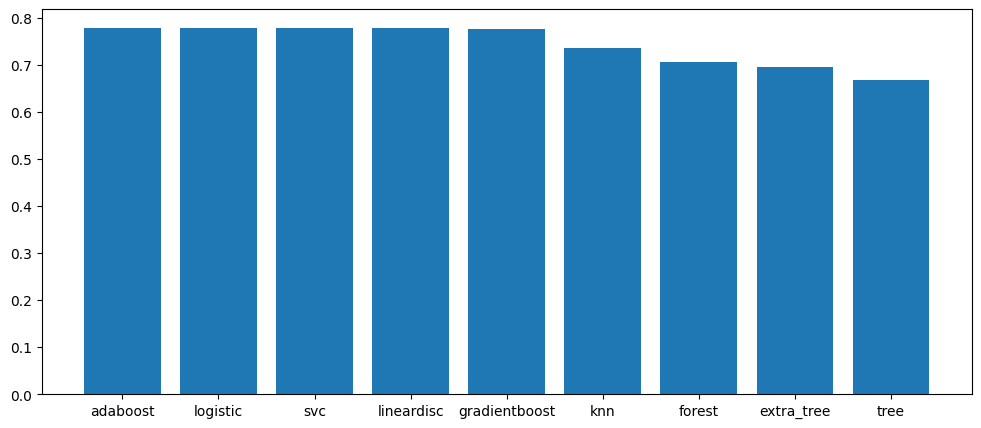

In [37]:
_x = res.groupby(['model']).mean().sort_values(by='accuracy', ascending=False).reset_index()
plt.figure(figsize = (12, 5))
plt.bar(_x['model'], _x['accuracy'])
plt.show()

In [38]:
print(classification_report(y_test, trained_models['adaboost'].predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      3102
           1       0.50      0.00      0.01       882

    accuracy                           0.78      3984
   macro avg       0.64      0.50      0.44      3984
weighted avg       0.72      0.78      0.68      3984



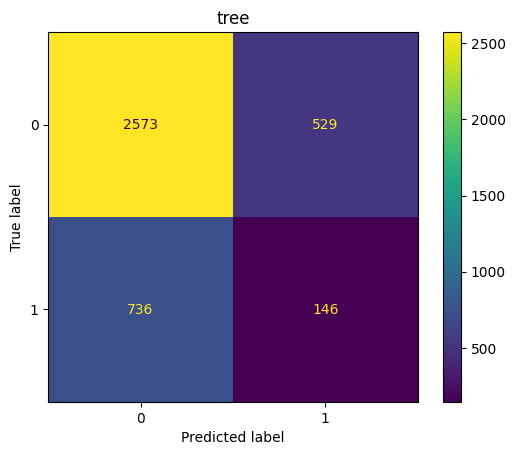

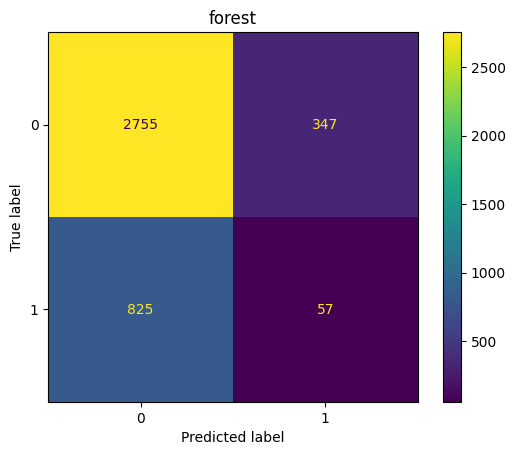

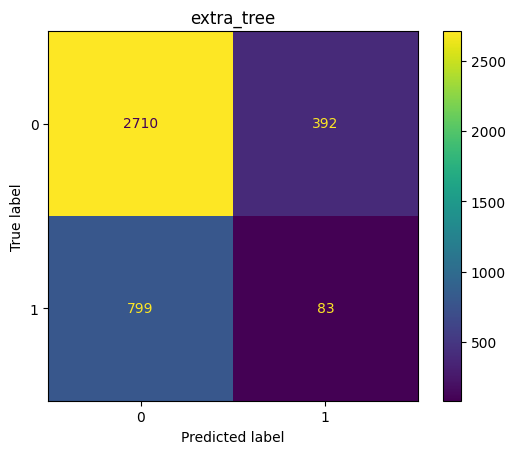

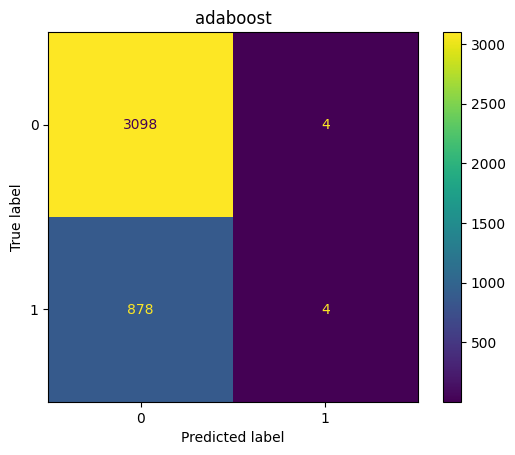

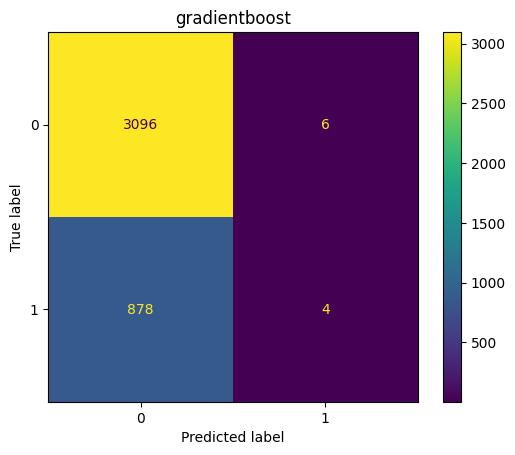

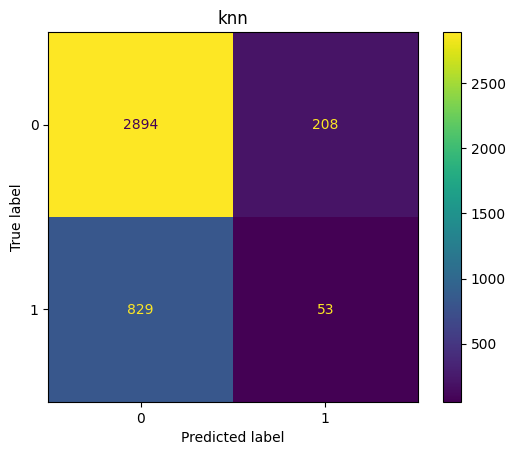

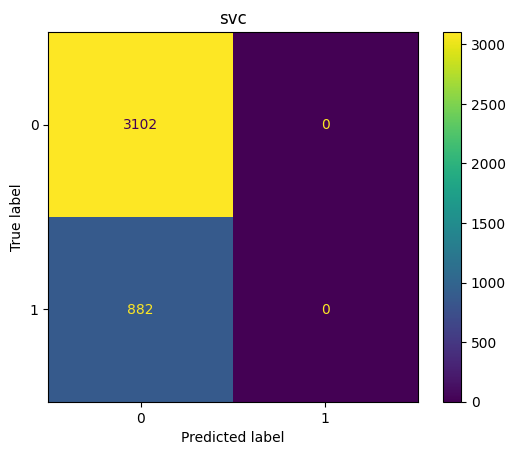

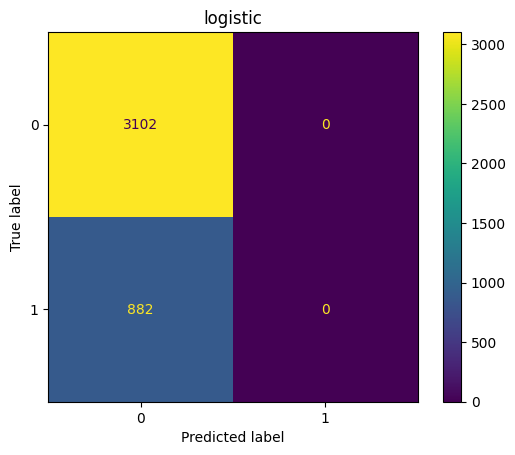

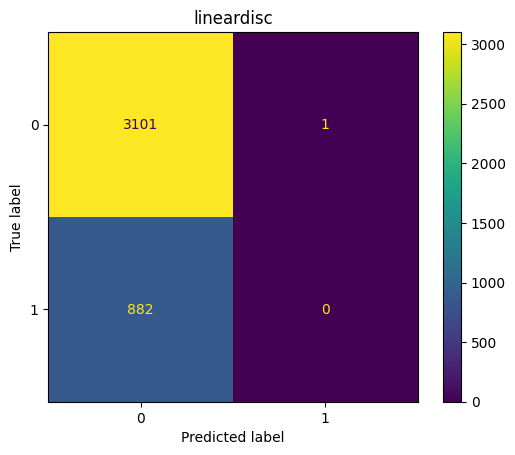

In [39]:
for i in models.keys():
    ConfusionMatrixDisplay(confusion_matrix(y_test, trained_models[i].predict(X_test)))\
        .plot().ax_.set_title(i)

In [40]:
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import recall_score

In [41]:
for i in trained_models.keys():
    _pred = trained_models[i].predict(X_test)
    print(i)
    print('precision: ', precision_score(y_test, _pred))
    print('f1 score:', f1_score(y_test, _pred))
    print()

tree
precision:  0.2162962962962963
f1 score: 0.1875401412973667

forest
precision:  0.14108910891089108
f1 score: 0.08864696734059098

extra_tree
precision:  0.17473684210526316
f1 score: 0.12232866617538687

adaboost
precision:  0.5
f1 score: 0.008988764044943821

gradientboost
precision:  0.4
f1 score: 0.008968609865470852

knn
precision:  0.20306513409961685
f1 score: 0.09273840769903761

svc
precision:  0.0
f1 score: 0.0

logistic
precision:  0.0
f1 score: 0.0

lineardisc
precision:  0.0
f1 score: 0.0



D:\Kaushik\github repos\time_series_analysis_and_forecasting_using_neural_networks\stock_trading_signalling\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Kaushik\github repos\time_series_analysis_and_forecasting_using_neural_networks\stock_trading_signalling\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision:  0.0
f1 score: 0.0
accuracy: 0.7786144578313253


D:\Kaushik\github repos\time_series_analysis_and_forecasting_using_neural_networks\stock_trading_signalling\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


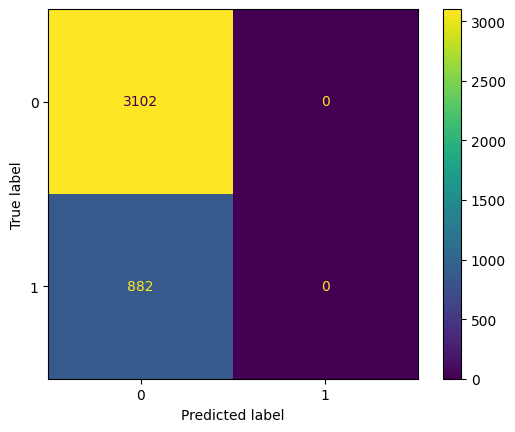

In [42]:
estimators = [('gradientboost', GradientBoostingClassifier(random_state=4444)),
              ('adaboost', AdaBoostClassifier(random_state=4444))
             ]

stacking_model = StackingClassifier(estimators, cv=10, n_jobs=-1, verbose=1)

stacking_model = stacking_model.fit(X_train, y_train)

_pred = stacking_model.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test,_pred)).plot()

print('precision: ', precision_score(y_test, _pred))
print('f1 score:', f1_score(y_test, _pred))
print('accuracy:', stacking_model.score(X_test, y_test))


In [43]:
X_train

,ADX,RSI,Close_EMA_10,EMA_10_EMA_30,MACD_Signal_MACD,RICKSHAWMAN,ABANDONEDBABY,HARAMICROSS,HARAMI,3WHITESOLDIERS,MORNINGSTAR,HAMMER
Date,,,,,,,,,,,,
2017-12-13 00:00:00+05:30,0.259279,0.598996,1,1,1,0,0,0,0,0,0,1
2016-09-08 00:00:00+05:30,0.280731,0.438194,0,0,1,0,0,0,0,0,0,1
2015-10-13 00:00:00+05:30,0.133206,0.545489,0,1,0,1,0,0,0,0,0,0
2015-06-08 00:00:00+05:30,0.200390,0.565221,1,1,1,1,0,0,0,0,0,0
2014-09-30 00:00:00+05:30,0.377473,0.675988,1,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-26 00:00:00+05:30,0.336762,0.396831,0,0,0,0,0,0,0,0,0,1
2012-09-13 00:00:00+05:30,0.433671,0.714040,1,1,1,1,0,0,0,0,0,1
2018-10-17 00:00:00+05:30,0.296873,0.555865,1,1,0,1,0,0,0,0,0,0
